In [95]:
# Importando bibliotecas que iremos utilizar...

import pandas as pd
import numpy as np
import matplotlib.pylab as plb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plb.style.use('seaborn')
plb.rc('axes', titlesize=10)

<ipython-input-95-1a402d13de06>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plb.style.use('seaborn')


In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
tab_calendario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_calendario.csv')
tab_produto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_produto.csv')
tab_setor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_setor.csv')
tab_fato_energia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fato_energia.csv')
tab_fato_populacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fato_populacao.csv')
tab_pais = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dim_pais.csv')

In [98]:
tab_pais = tab_pais.rename (columns = {'fk_pais_1':'fk_pais'})


In [99]:
tab_energia = pd.merge(tab_fato_energia,tab_setor, on = 'fk_setor', how = 'inner')
tab_energia = pd.merge(tab_energia, tab_produto, on = 'fk_produto', how = 'inner')
tab_energia = pd.merge(tab_energia, tab_pais, on = 'fk_pais', how = 'inner')
tab_energia = pd.merge(tab_energia, tab_calendario, on = 'fk_calendario', how = 'inner')



In [100]:
tab_energia

,id_energia,fk_pais,fk_setor,fk_produto,fk_calendario,valor,nome_setor,nome_produto,tipo,nome_pais,pais_bloco,pais_regiao,pais_renda,ano
0,1,2,9,1,1,1368.251838,Production (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971
1,2,2,5,1,1,0,Imports (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971
2,3,2,4,1,1,-541.4240011,Exports (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971
3,4,2,11,1,1,884.2974695,Total energy supply (PJ),"Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971
4,5,2,3,1,1,-516.5385537,"Electricity, CHP and heat plants (PJ)","Coal, peat and oil shale",NRW,Australia,AUS,East Asia & Pacific,High income,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217795,217666,1,10,5,50,0,Residential (PJ),Heat,NRW,Africa,CAF,Sub-Saharan Africa,Low income,2020
217796,217667,1,1,5,50,0,Commercial and public services (PJ),Heat,NRW,Africa,CAF,Sub-Saharan Africa,Low income,2020
217797,217668,1,8,5,50,0,Other final consumption (PJ),Heat,NRW,Africa,CAF,Sub-Saharan Africa,Low income,2020
217798,217798,1,2,4,50,640427.364,Electricity output (GWh),Fossil fuels,NRW,Africa,CAF,Sub-Saharan Africa,Low income,2020


In [101]:
final = tab_energia[['nome_pais','pais_regiao','pais_bloco','pais_renda','tipo','nome_setor','nome_produto','ano','valor']]
final


,nome_pais,pais_regiao,pais_bloco,pais_renda,tipo,nome_setor,nome_produto,ano,valor
0,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),"Coal, peat and oil shale",1971,1368.251838
1,Australia,East Asia & Pacific,AUS,High income,NRW,Imports (PJ),"Coal, peat and oil shale",1971,0
2,Australia,East Asia & Pacific,AUS,High income,NRW,Exports (PJ),"Coal, peat and oil shale",1971,-541.4240011
3,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),"Coal, peat and oil shale",1971,884.2974695
4,Australia,East Asia & Pacific,AUS,High income,NRW,"Electricity, CHP and heat plants (PJ)","Coal, peat and oil shale",1971,-516.5385537
...,...,...,...,...,...,...,...,...,...
217795,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Residential (PJ),Heat,2020,0
217796,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Commercial and public services (PJ),Heat,2020,0
217797,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Other final consumption (PJ),Heat,2020,0
217798,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Electricity output (GWh),Fossil fuels,2020,640427.364


In [129]:
final.to_csv("tabelaEnergia.csv", index = False)

In [9]:
Total= final[(final['nome_setor'] == 'Total energy supply (PJ)')]
Total

,nome_pais,pais_regiao,pais_bloco,pais_renda,tipo,nome_setor,nome_produto,ano,valor
3,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),"Coal, peat and oil shale",1971,884.2974695
15,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),"Crude, NGL and feedstocks",1971,1051.352762
27,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),Oil products,1971,-40.37049887
39,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),Natural gas,1971,75.06450081
51,Australia,East Asia & Pacific,AUS,High income,NRW,Total energy supply (PJ),Nuclear,1971,0
...,...,...,...,...,...,...,...,...,...
217740,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Total energy supply (PJ),Natural gas,2020,5576.588536
217752,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Total energy supply (PJ),Nuclear,2020,108.0327289
217765,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Total energy supply (PJ),Renewables and waste,2020,17320.38447
217777,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Total energy supply (PJ),Electricity,2020,0.6764110344


In [10]:
Total1= final[(final['nome_setor'] == 'Production (PJ)')]
Total1

,nome_pais,pais_regiao,pais_bloco,pais_renda,tipo,nome_setor,nome_produto,ano,valor
0,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),"Coal, peat and oil shale",1971,1368.251838
12,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),"Crude, NGL and feedstocks",1971,620.7177142
24,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),Oil products,1971,0
36,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),Natural gas,1971,75.06450081
48,Australia,East Asia & Pacific,AUS,High income,NRW,Production (PJ),Nuclear,1971,0
...,...,...,...,...,...,...,...,...,...
217737,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Production (PJ),Natural gas,2020,8279.611624
217749,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Production (PJ),Nuclear,2020,108.0327289
217762,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Production (PJ),Renewables and waste,2020,17187.83604
217774,Africa,Sub-Saharan Africa,CAF,Low income,NRW,Production (PJ),Electricity,2020,0


In [11]:
fossil= final[(final['nome_produto'] == 'Fossil fuels')]
fossil

,nome_pais,pais_regiao,pais_bloco,pais_renda,tipo,nome_setor,nome_produto,ano,valor
97,Australia,East Asia & Pacific,AUS,High income,NRW,Electricity output (GWh),Fossil fuels,1971,41201
196,Austria,Europe & Central Asia,AUT,High income,NRW,Electricity output (GWh),Fossil fuels,1971,11752
295,Belgium,Europe & Central Asia,BEL,High income,NRW,Electricity output (GWh),Fossil fuels,1971,33103
394,Canada,North America,CAN,High income,NRW,Electricity output (GWh),Fossil fuels,1971,55105
493,Chile,Latin America & Caribbean,CHL,High income,NRW,Electricity output (GWh),Fossil fuels,1971,3649
...,...,...,...,...,...,...,...,...,...
217402,Morocco,Middle East & North Africa,MAR,Lower middle income,NRW,Electricity output (GWh),Fossil fuels,2020,31352.72
217501,Singapore,East Asia & Pacific,SGP,High income,NRW,Electricity output (GWh),Fossil fuels,2020,51593.76
217600,South Africa,Sub-Saharan Africa,ZAF,Upper middle income,NRW,Electricity output (GWh),Fossil fuels,2020,212059.965
217699,Thailand,East Asia & Pacific,THA,Upper middle income,NRW,Electricity output (GWh),Fossil fuels,2020,149836.984


 # Análise Exploratória

In [102]:
# Shape dos dados
final.shape

(217800, 9)

In [103]:
# Tipos de Dados
final.dtypes

nome_pais       object
pais_regiao     object
pais_bloco      object
pais_renda      object
tipo            object
nome_setor      object
nome_produto    object
ano              int64
valor           object
dtype: object

In [ ]:
final.valor= pd.to_numeric(final.valor , errors='coerce')

In [84]:
Total1.valor= pd.to_numeric(Total1.valor , errors='coerce')

<ipython-input-84-9dece30fd586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total1.valor= pd.to_numeric(Total1.valor , errors='coerce')


In [105]:
final.dtypes

nome_pais        object
pais_regiao      object
pais_bloco       object
pais_renda       object
tipo             object
nome_setor       object
nome_produto     object
ano               int64
valor           float64
dtype: object

In [106]:
# Verificando valores missing
print(final.isna().sum())

nome_pais           0
pais_regiao         0
pais_bloco          0
pais_renda          0
tipo                0
nome_setor          0
nome_produto        0
ano                 0
valor           21381
dtype: int64


In [107]:
# Removendo as linhas com valores missing
final.dropna(inplace = True)

<ipython-input-107-d726ada4f8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.dropna(inplace = True)


In [18]:
final.dtypes

nome_pais        object
pais_regiao      object
pais_bloco       object
pais_renda       object
tipo             object
nome_setor       object
nome_produto     object
ano               int64
valor           float64
dtype: object

In [19]:
# Shape
final.shape

(196419, 9)

In [20]:
# Verificando Valores Únicos
final.nunique()

nome_pais           44
pais_regiao          7
pais_bloco          44
pais_renda           4
tipo                 2
nome_setor          13
nome_produto        10
ano                 50
valor           101741
dtype: int64

In [108]:
tbfinal = Total1[(Total1['valor']>0)]

In [86]:
tbfinal = Total1[(Total1['ano']> 2015)]

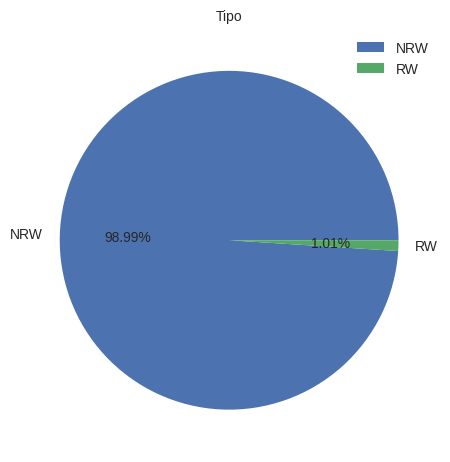

In [109]:
import matplotlib.pyplot as plt

# Gráfico de Pizza de Tipos de Visitantes
labels = ['NRW', 'RW']
plt.title("Tipo")
plt.pie(final['tipo'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

In [110]:
final['pais_renda'].value_counts()

High income            163155
Upper middle income     19107
Lower middle income      9207
Low income               4950
Name: pais_renda, dtype: int64

In [111]:
final['nome_produto'].value_counts()

Nuclear                      25883
Crude, NGL and feedstocks    23892
Oil products                 23892
Natural gas                  23889
Coal, peat and oil shale     23887
Electricity                  23853
Renewables and waste         23851
Heat                         23290
Fossil fuels                  1991
Renewable sources             1991
Name: nome_produto, dtype: int64

In [112]:
final['nome_setor'].value_counts()

Total energy supply (PJ)                 15928
Oil refineries, transformation (PJ)      15928
Total final consumption (PJ)             15928
Industry (PJ)                            15928
Transport (PJ)                           15928
Imports (PJ)                             15901
Exports (PJ)                             15897
Electricity, CHP and heat plants (PJ)    15842
Other final consumption (PJ)             15804
Commercial and public services (PJ)      15799
Residential (PJ)                         15794
Production (PJ)                          15769
Electricity output (GWh)                  5973
Name: nome_setor, dtype: int64

In [113]:
final['tipo'].value_counts()

NRW    194428
RW       1991
Name: tipo, dtype: int64

In [114]:
final['pais_regiao'].value_counts()

Europe & Central Asia         120782
East Asia & Pacific            28809
Latin America & Caribbean      17919
North America                   9809
Sub-Saharan Africa              8019
Middle East & North Africa      8012
South Asia                      3069
Name: pais_regiao, dtype: int64

#Análise de Regressão Linear Simples
A Análise de Regressão Linear Simples é uma metodologia estatística que utiliza a relação estatística entre duas variáveis quantitativas, tal que a variável resposta possa ser estimada ou prevista atráves da variável explicativa.

#3.2 Construção do Modelo
Pode-se obter coeficientes β0
 e β1
 a partir da função OLS da biblioteca statsmodels existente na linguagem python para encontrar um modelo que se ajuste aos dados atráves do Método dos Míninos Quadrados.



In [128]:
X = np.array(final["ano"]).reshape((-1,1))
Y = np.array(final["valor"])



Os coeficientes estimados são: β0=8.749 e β1=45.1455 , sendo assim o modelo tem a forma de Y=2.38+0.30X

O p-valor para Pr(>|t|)<0.0, com isto, pode-se afirmar que β1
 é igual a de zero, ou seja, o ano não é relacionado com a produção de energia.

In [116]:
modelo = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     37.62
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           8.61e-10
Time:                        21:23:20   Log-Likelihood:            -2.3877e+06
No. Observations:              196419   AIC:                         4.775e+06
Df Residuals:                  196417   BIC:                         4.775e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.749e+04   1.47e+04     -5.952      0.0

In [117]:
sm.stats.anova_lm(ols('ano ~ valor', data=final).fit())

,df,sum_sq,mean_sq,F,PR(>F)
valor,1.0,7.493477e+03,7493.477045,37.621561,8.605284e-10
Residual,196417.0,3.912241e+07,199.180388,NaN,NaN


#Análise de Resíduos
Os pressupostos do modelo ajustado precisam ser validadas para que os resultados sejam confiáveis. A Análise dos Resíduos investiga a adequabilidade de um modelo de regressão com base nos resíduos que é dado pela diferença entre a variável resposta observada (Y)
 e a variável resposta estimada (Y)
.

A ideia básica da análise dos resíduos é que, se o modelo for apropriado, os resíduos devem refletir os pressupostos impostos pelo termo de erro do modelo que são:

##Pressupostos sobre a regressão
*Linearidade - a relação entre x e y é linear;

*Homoscedasticidade - assume que os resíduos tem variância constante;

*Indepêndencia - assume que os termos de erro são independentes;

*Normalidade - assume que os resíduos são normalmente distribuídos;

No processo de análise de resíduos, é possível notar a  presença de valores influentes nos dados como: outliers.

Text(0, 0.5, 'valor')

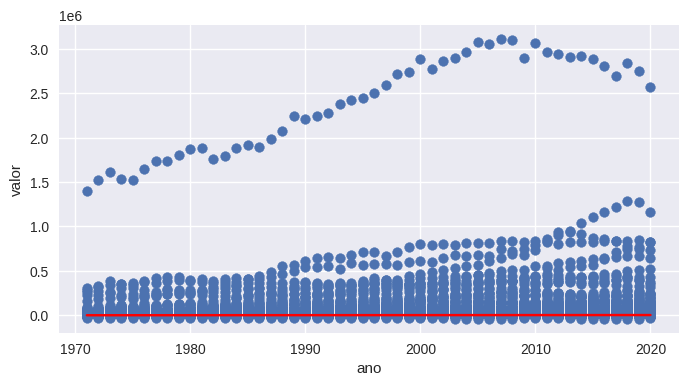

In [118]:
plb.figure(figsize=(8, 4))
plb.scatter(X,Y)
plb.plot(X, modelo.predict(), color="r")
plb.xlabel("ano")
plb.ylabel("valor")


In [119]:
# Construção de diagnóstico para os gráficos
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_residuos = modelo.resid # Residuos
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados
modelo_outliers = modelo.get_influence().hat_matrix_diag # Outliers
distancia_cook = modelo.get_influence().cooks_distance[0] # Distanci de Cook

In [120]:
dataframe = pd.concat([final['ano'], final['valor']], axis=1)

#Teste de Normalidade
O gráfico QQ de resíduos pode ser usado para verificar visualmente a suposição de normalidade. Sendo que para que se aceite que os resíduos estão normalmente distribuidos deve seguir aproximadamente uma linha recta.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

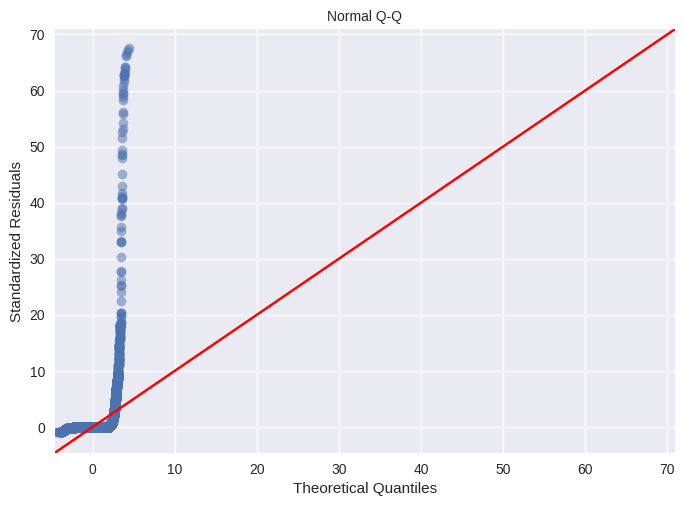

In [121]:
QQ = ProbPlot(modelo_norm_resid)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')